In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
plt.style.use('seaborn')

In [68]:
df = pd.read_csv('../clean_data/2017_combined_data.csv', index_col=0)

In [69]:
df.index = pd.to_datetime(df.index)
df.index = df.index.tz_localize('UTC')
df.index = df.index.tz_convert('America/New_York')

In [70]:
df_count_hourly = df.groupby(df.index.hour).sum()

In [71]:
df_count_hourly['pickup_count'].sum()

1471188

In [72]:
df_mean_hourly = df.groupby(df.index.hour).mean()

In [73]:
df_mean_hourly.head()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
0,241.944751,281.967459,279.056630,284.570442,1016.419890,66.348066,3.403315,207.756906,677.818182
1,70.740331,281.571271,278.736188,284.167127,1016.331492,68.977901,3.359116,206.292818,425.193548
2,18.138889,281.238278,278.379389,283.929389,1016.216667,71.355556,3.277778,202.722222,269.960000
3,4.160221,280.815475,277.999232,283.579343,1016.220994,72.718232,3.060773,198.828729,149.333333
4,4.889503,280.521166,277.722989,283.325199,1016.093923,73.591160,3.049724,202.127072,148.625000


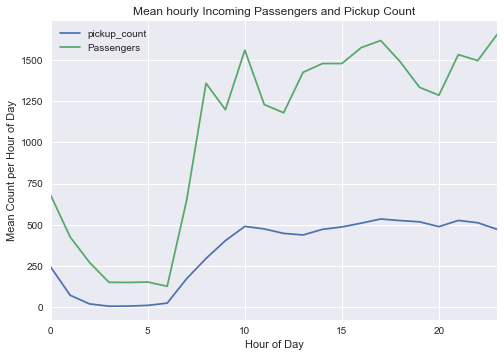

In [74]:
_ = df_mean_hourly.pickup_count.plot()
_ = df_mean_hourly.Passengers.plot()
plt.xlabel('Hour of Day')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper left')
plt.title('Mean hourly Incoming Passengers and Pickup Count')
plt.show()

In [75]:
df_daily = df.resample('D').sum()
df_daily.tail()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
2017-06-26 00:00:00-04:00,10466,7063.17,6988.6,7124.6,24387.0,995.0,69.0,6537.0,28194.0
2017-06-27 00:00:00-04:00,8510,7033.08,6961.6,7095.6,24368.0,1340.0,50.0,5010.0,27986.0
2017-06-28 00:00:00-04:00,9464,7036.21,6967.6,7096.6,24460.0,1193.0,66.0,6738.0,27611.0
2017-06-29 00:00:00-04:00,8598,7105.45,7032.6,7169.6,24458.0,1323.0,104.0,5032.0,28253.0
2017-06-30 00:00:00-04:00,7039,7179.05,7110.6,7230.6,24366.0,1403.0,104.0,5354.0,28074.0


In [76]:
df_mean_daily = df_daily.groupby(df_daily.index.dayofweek).mean()

In [77]:
df_mean_daily.head()

,pickup_count,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,Passengers
0,9659.769231,6775.575885,6715.399731,6830.784346,24456.000000,1509.076923,85.115385,4857.653846,25846.769231
1,8612.538462,6796.374923,6737.120692,6849.928385,24375.384615,1733.692308,85.884615,3941.615385,25009.846154
2,8935.423077,6827.692462,6768.008231,6879.623615,24325.230769,1568.230769,90.153846,4901.846154,25855.076923
3,8718.346154,6808.728154,6747.381231,6862.996615,24353.423077,1477.576923,96.961538,5208.230769,25585.038462
4,8547.269231,6798.810654,6742.374885,6847.451808,24369.384615,1535.307692,92.807692,5143.884615,26481.461538


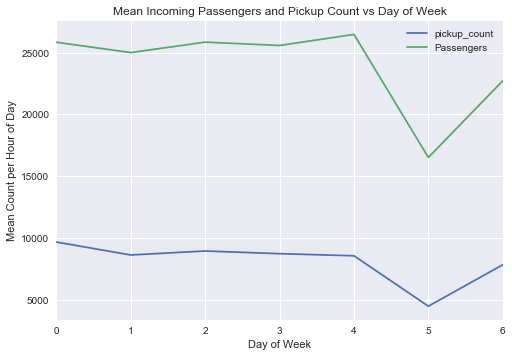

In [78]:
_ = df_mean_daily.pickup_count.plot()
_ = df_mean_daily.Passengers.plot()
plt.xlabel('Day of Week')
plt.ylabel('Mean Count per Hour of Day')
plt.legend(loc='upper right')
plt.title('Mean Incoming Passengers and Pickup Count vs Day of Week')
plt.show()

### Making bar chart comparing pickup count to incoming passengers per day of week

In [79]:
df_bar_plot = df_mean_daily.copy()

In [80]:
df_bar_plot.rename(index = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)

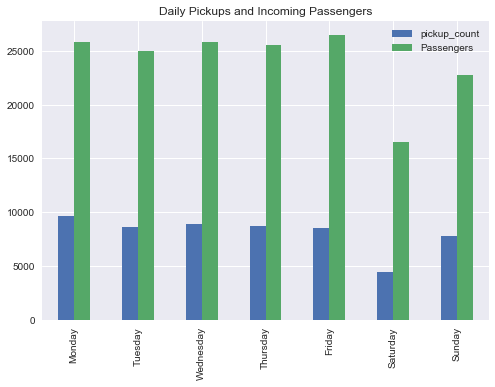

In [81]:
df_bar_plot = df_bar_plot[['pickup_count', 'Passengers']]
df_bar_plot.plot(kind='bar')
plt.title('Daily Pickups and Incoming Passengers')

### Re-Making the Hourly Plot Faceted by Weekday/Weekend

In [82]:
df2 = df.groupby([df.index.dayofweek, df.index.hour])['pickup_count', 'Passengers'].mean()

In [83]:
df3 = pd.DataFrame(df2)

In [84]:
df3.reset_index(inplace=True)

In [85]:
df4 = df3.groupby([df3.level_0 < 6, df3.level_1])['pickup_count', 'Passengers'].mean()

In [86]:
df4.index.set_levels([['Weekend', 'Weekday'], range(24)], inplace=True)

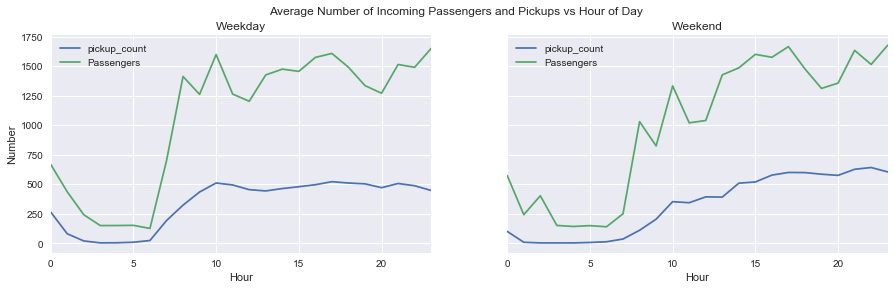

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4), sharey=True)

df4.loc['Weekday'].plot(ax=axes[0])
axes[0].set_title('Weekday')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number')

df4.loc['Weekend'].plot(ax=axes[1])
axes[1].set_title('Weekend')
axes[1].set_xlabel('Hour')
fig.suptitle('Average Number of Incoming Passengers and Pickups vs Hour of Day')